In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv("./DATA/DATA[4].csv")

In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=22051662)

In [38]:
xcols = ['il', 'iw', 'pl', 'pw']
ycols = ['freq', 's11', 'gain']

In [39]:
X_train, X_test = train[xcols].values, test[xcols].values
y_train, y_test = train[ycols].values, test[ycols].values

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
Scaler_X = MinMaxScaler().fit(X_train)
Scaler_Y = MinMaxScaler().fit(y_train)

In [42]:
X_train_scaled = Scaler_X.transform(X_train)
X_test_scaled = Scaler_X.transform(X_test)

y_train_scaled = Scaler_Y.transform(y_train)
y_test_scaled = Scaler_Y.transform(y_test)

In [43]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()

model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='linear'))

model.compile(
    loss='mean_squared_error', 
    optimizer='adam', 
    metrics=['mae', 'mse', 'accuracy', 'r2_score'],
    jit_compile='auto'
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,739 (549.76 KB)

 Trainable params: 140,739 (549.76 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
EPOCHS = 1000

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=EPOCHS
)

Epoch 1/1000


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5028 - loss: 0.4890 - mae: 0.6237 - mse: 0.4890 - r2_score: -16.8745 - val_accuracy: 0.4717 - val_loss: 0.1562 - val_mae: 0.3335 - val_mse: 0.1562 - val_r2_score: -2.0485
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6363 - loss: 0.1258 - mae: 0.2919 - mse: 0.1258 - r2_score: -2.9309 - val_accuracy: 0.4717 - val_loss: 0.1173 - val_mae: 0.2801 - val_mse: 0.1173 - val_r2_score: -1.4838
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5975 - loss: 0.0837 - mae: 0.2325 - mse: 0.0837 - r2_score: -1.1479 - val_accuracy: 0.5283 - val_loss: 0.0856 - val_mae: 0.2360 - val_mse: 0.0856 - val_r2_score: -0.7458
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6927 - loss: 0.0794 - mae: 0.2278 - mse: 0.0794 - r2_score: -0.7891 - val_accuracy: 0.5849 - val_loss: 0.0592 - val_mae: 0.1920 - val_mse: 0.0592 - val_r2_score: -0.1132
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7871 - 

In [45]:
model.get_metrics_result()

{'accuracy': 0.849056601524353,
 'loss': 0.00782802514731884,
 'mae': 0.04645942896604538,
 'mse': 0.00782802514731884,
 'r2_score': 0.8953307271003723}

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000215ACDC31A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


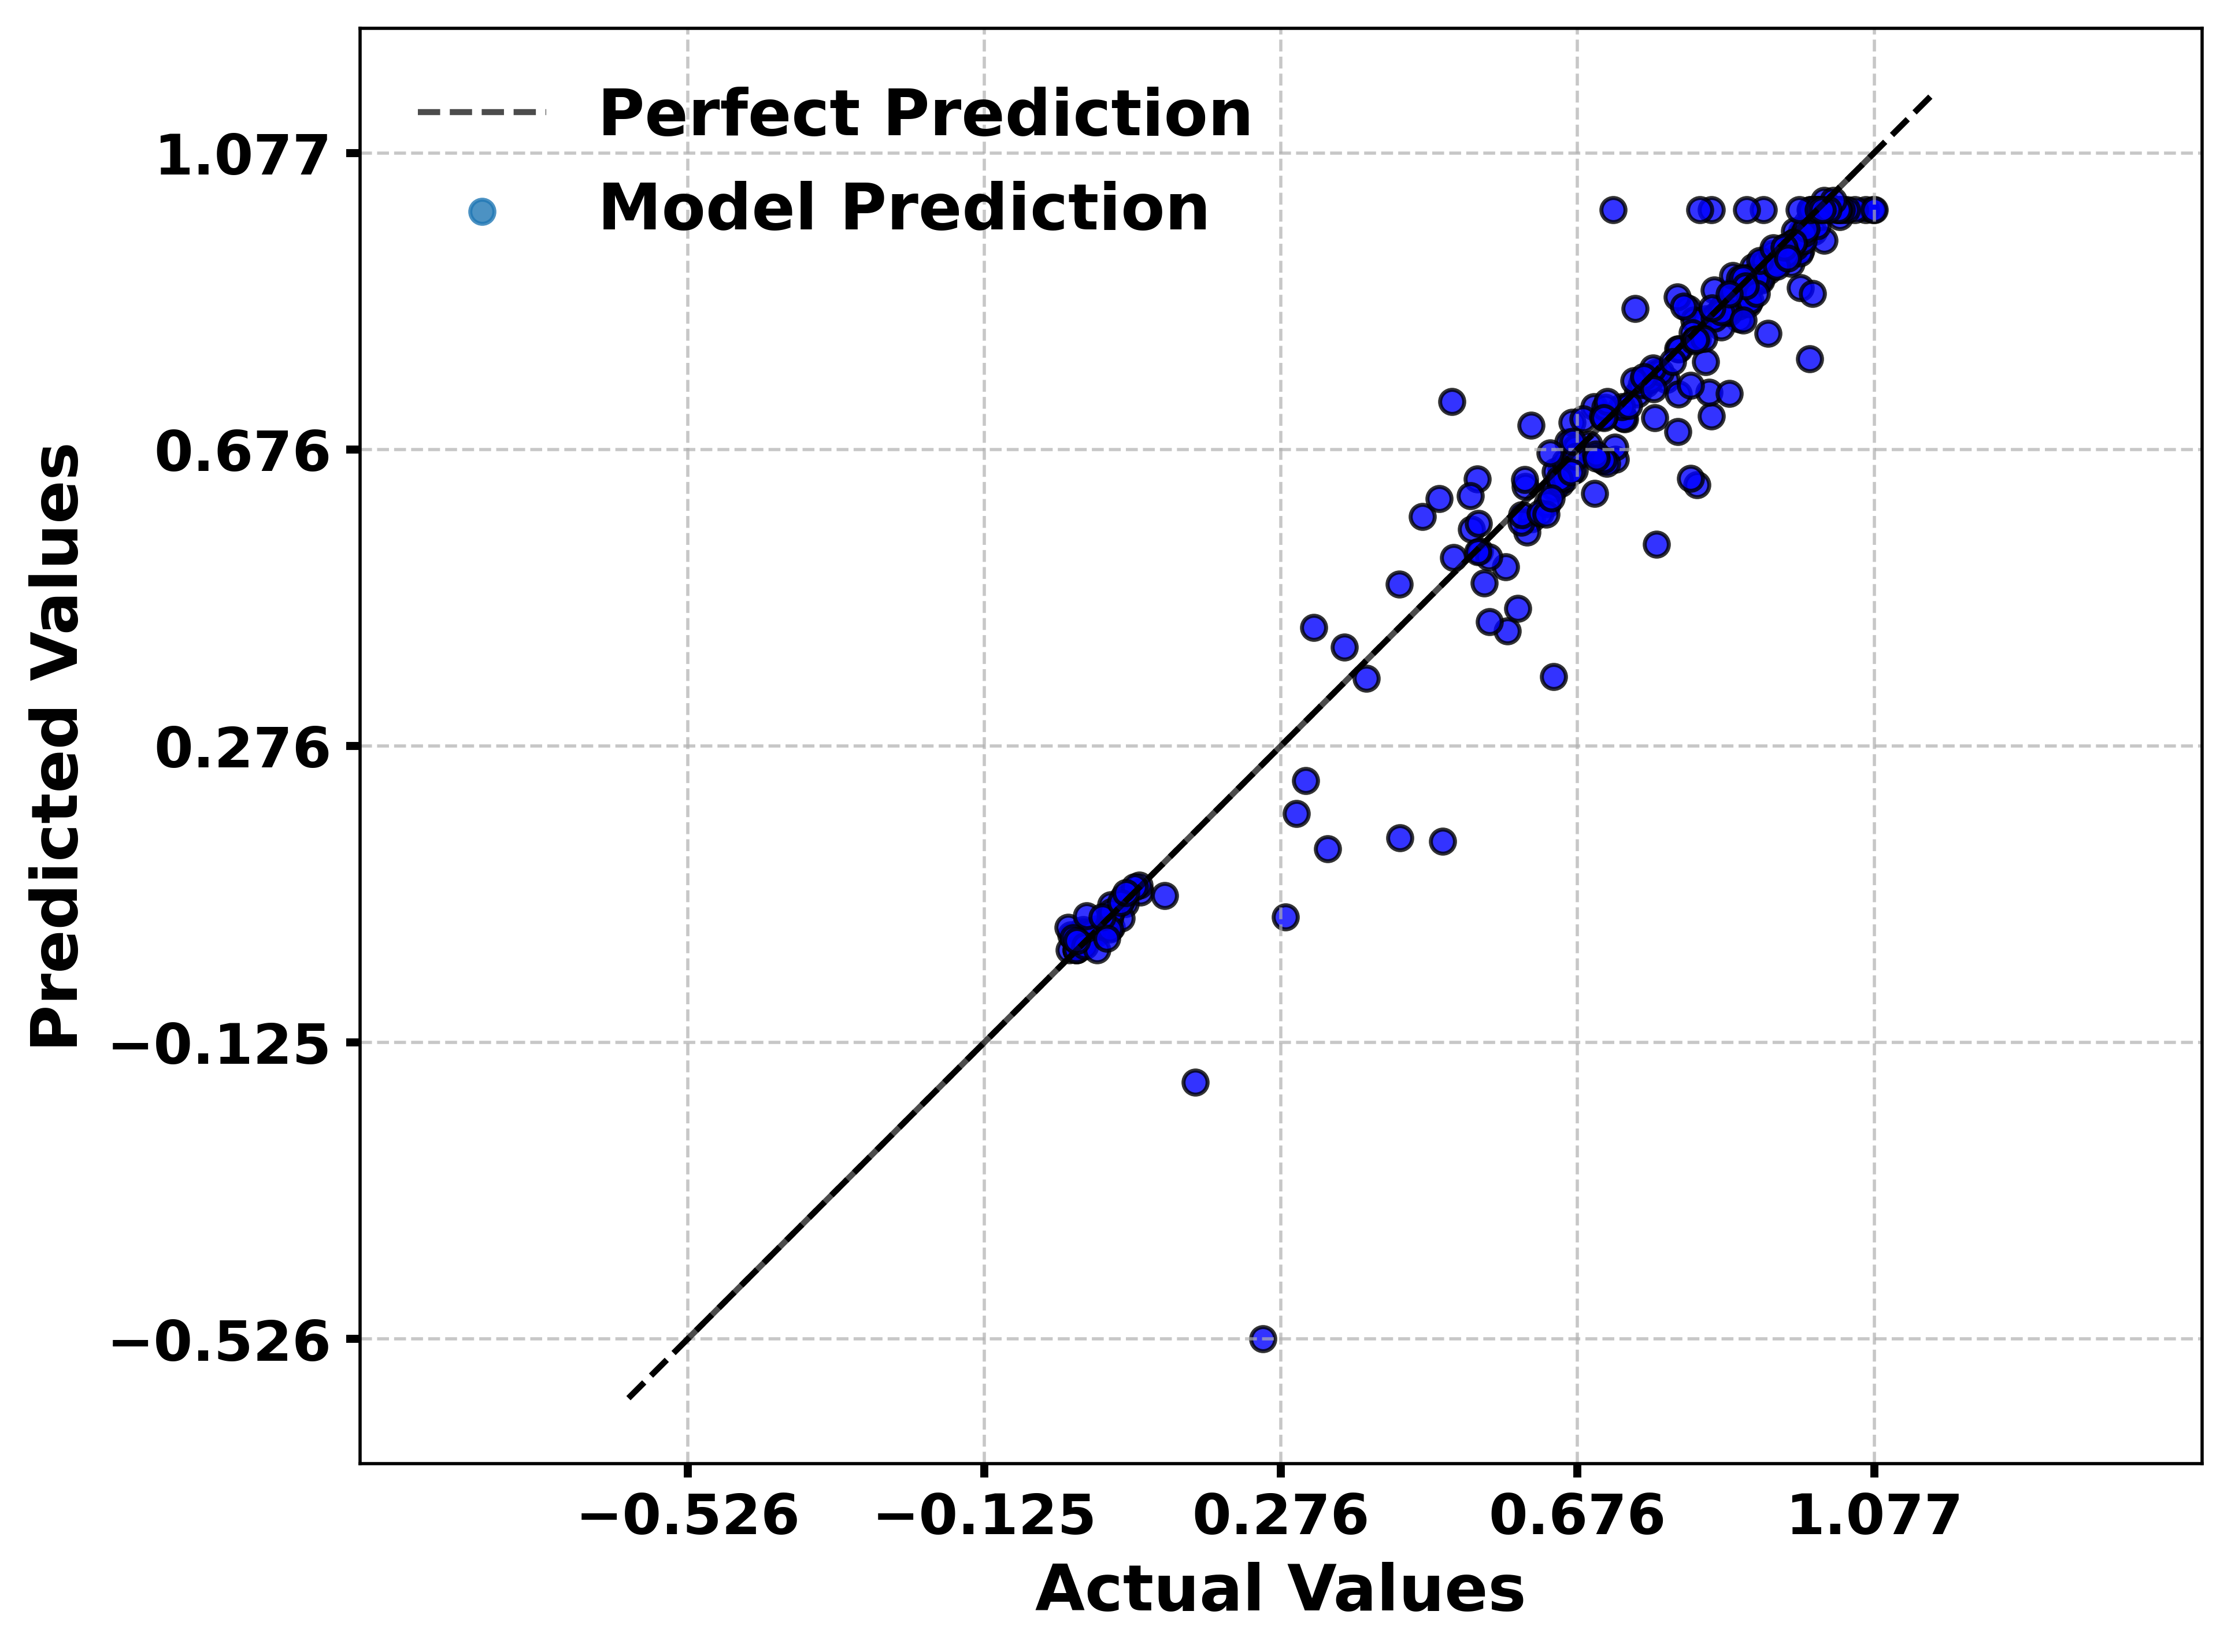

R² Score: 0.8615
Mean Absolute Error (MAE): 0.0408
Mean Squared Error (MSE): 0.0069
Explained Variance Score: 0.8724


In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

plt.rcParams.update({'font.size': 16})

def plot_predictions(model, X_test_scaled, y_test_scaled):
    predicted = model.predict(X_test_scaled)
    

    display = PredictionErrorDisplay(y_true=y_test_scaled, y_pred=predicted)    
    fig, ax = plt.subplots(figsize=(8, 6), dpi=500)
    display.plot(kind="actual_vs_predicted", ax=ax)
 
    ax.set_xlabel("Actual Values", fontsize=16, fontweight='bold') 
    ax.set_ylabel("Predicted Values", fontsize=16, fontweight='bold') 
    ax.tick_params(axis='both', which='major', labelsize=14, width=2)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    ax.grid(True, linestyle='--', alpha=0.7)
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="black") 
    
    legend = ax.legend(['Perfect Prediction', 'Model Prediction'], loc='upper left', fontsize=16, frameon=False)
    for text in legend.get_texts():
        text.set_fontweight('bold')

    ax.lines[0].set_color('black') 
    ax.collections[0].set_edgecolor('black') 
    ax.collections[0].set_facecolor('blue')

    plt.tight_layout()
    plt.savefig(r'C:\Users\KIIT\OneDrive\Documents\RESEARCH_PAPERS\SHARAD\DRAFTS\GHz\MANUSCRIPT\NeuralNetwork.png', dpi=500)
    plt.show()

    return predicted


predicted = plot_predictions(model, X_test_scaled, y_test_scaled)

r2 = r2_score(y_test_scaled, predicted)
mae = mean_absolute_error(y_test_scaled, predicted)
mse = mean_squared_error(y_test_scaled, predicted)
explained_variance = explained_variance_score(y_test_scaled, predicted)

print(f"\033[1mR² Score:\033[0m {r2:.4f}")
print(f"\033[1mMean Absolute Error (MAE):\033[0m {mae:.4f}")
print(f"\033[1mMean Squared Error (MSE):\033[0m {mse:.4f}")
print(f"\033[1mExplained Variance Score:\033[0m {explained_variance:.4f}")

In [47]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

mae = history.history['mae']
val_mae = history.history['val_mae']

mse = history.history['mse']
val_mse = history.history['val_mse']

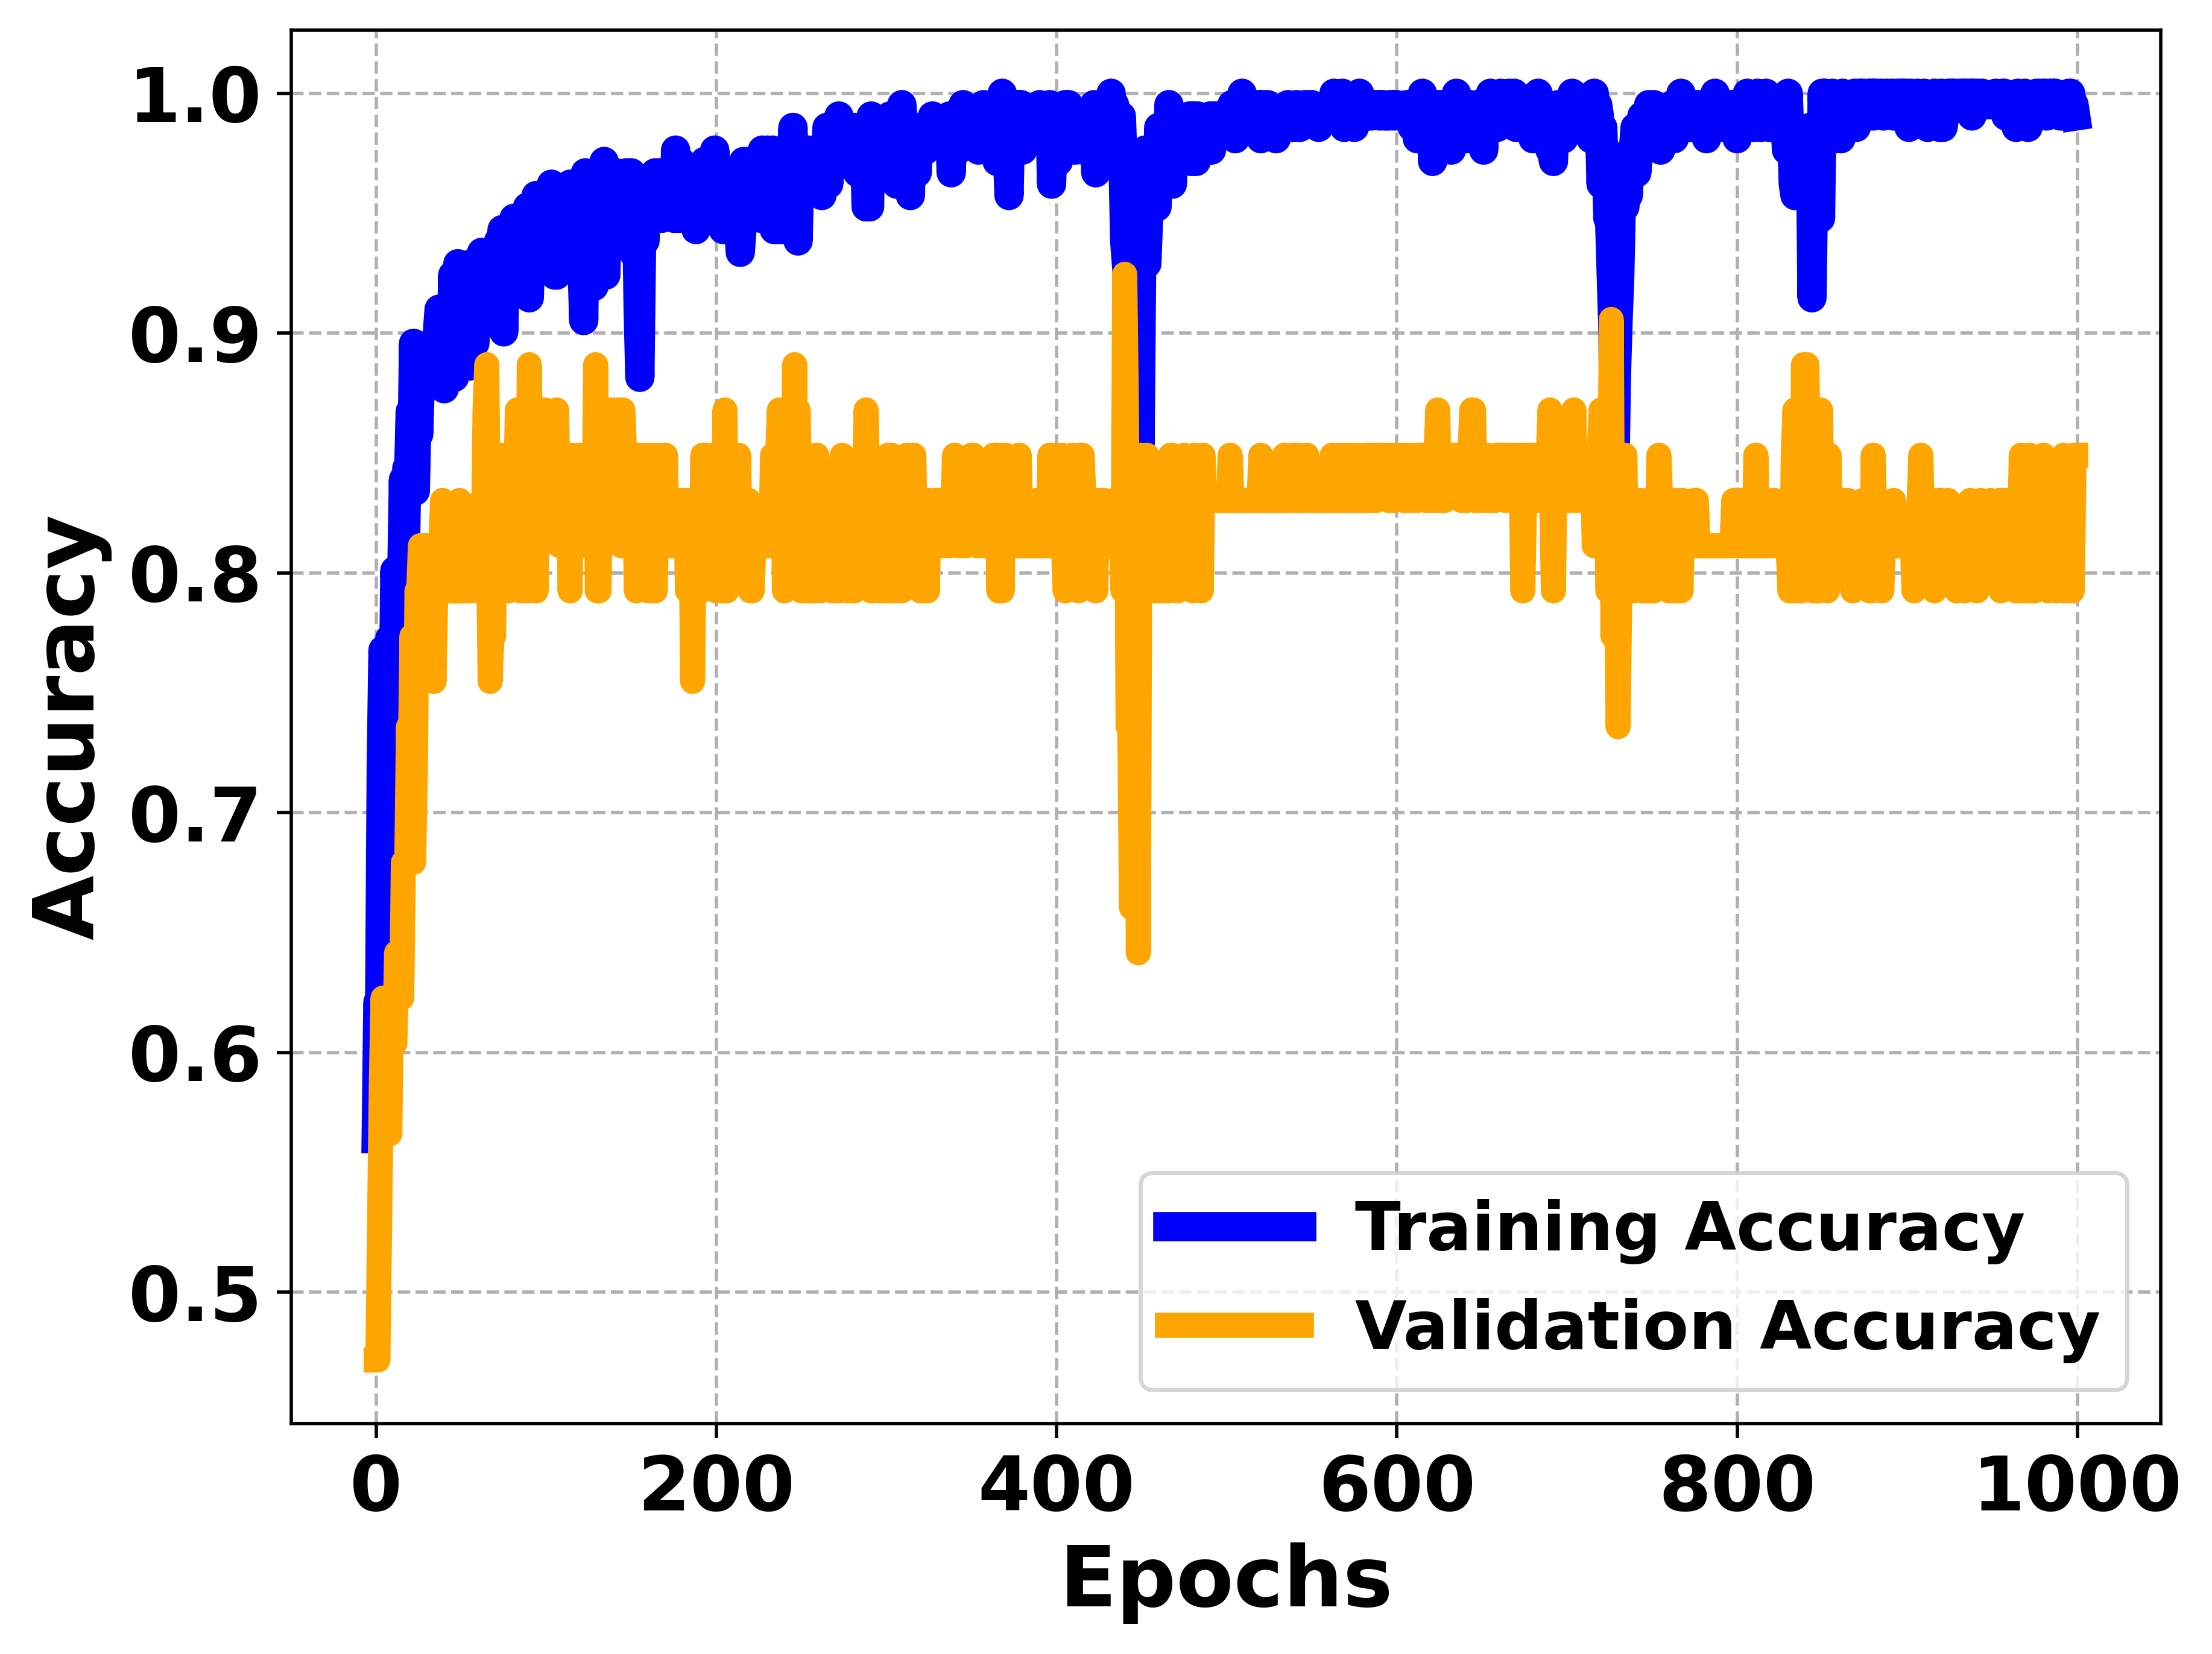

In [48]:

plt.figure(figsize=(8, 6), dpi=500)
plt.plot(accuracy, label='Training Accuracy', color='blue', linewidth=7, alpha=1)
plt.plot(val_accuracy, label='Validation Accuracy', color='orange', linewidth=6, alpha=1)
plt.xlabel('Epochs', fontsize=20, fontweight='bold')
plt.ylabel('Accuracy', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend(fontsize=18, prop={'weight': 'bold'})  
plt.grid(True, linestyle='--', alpha=1)
plt.show()

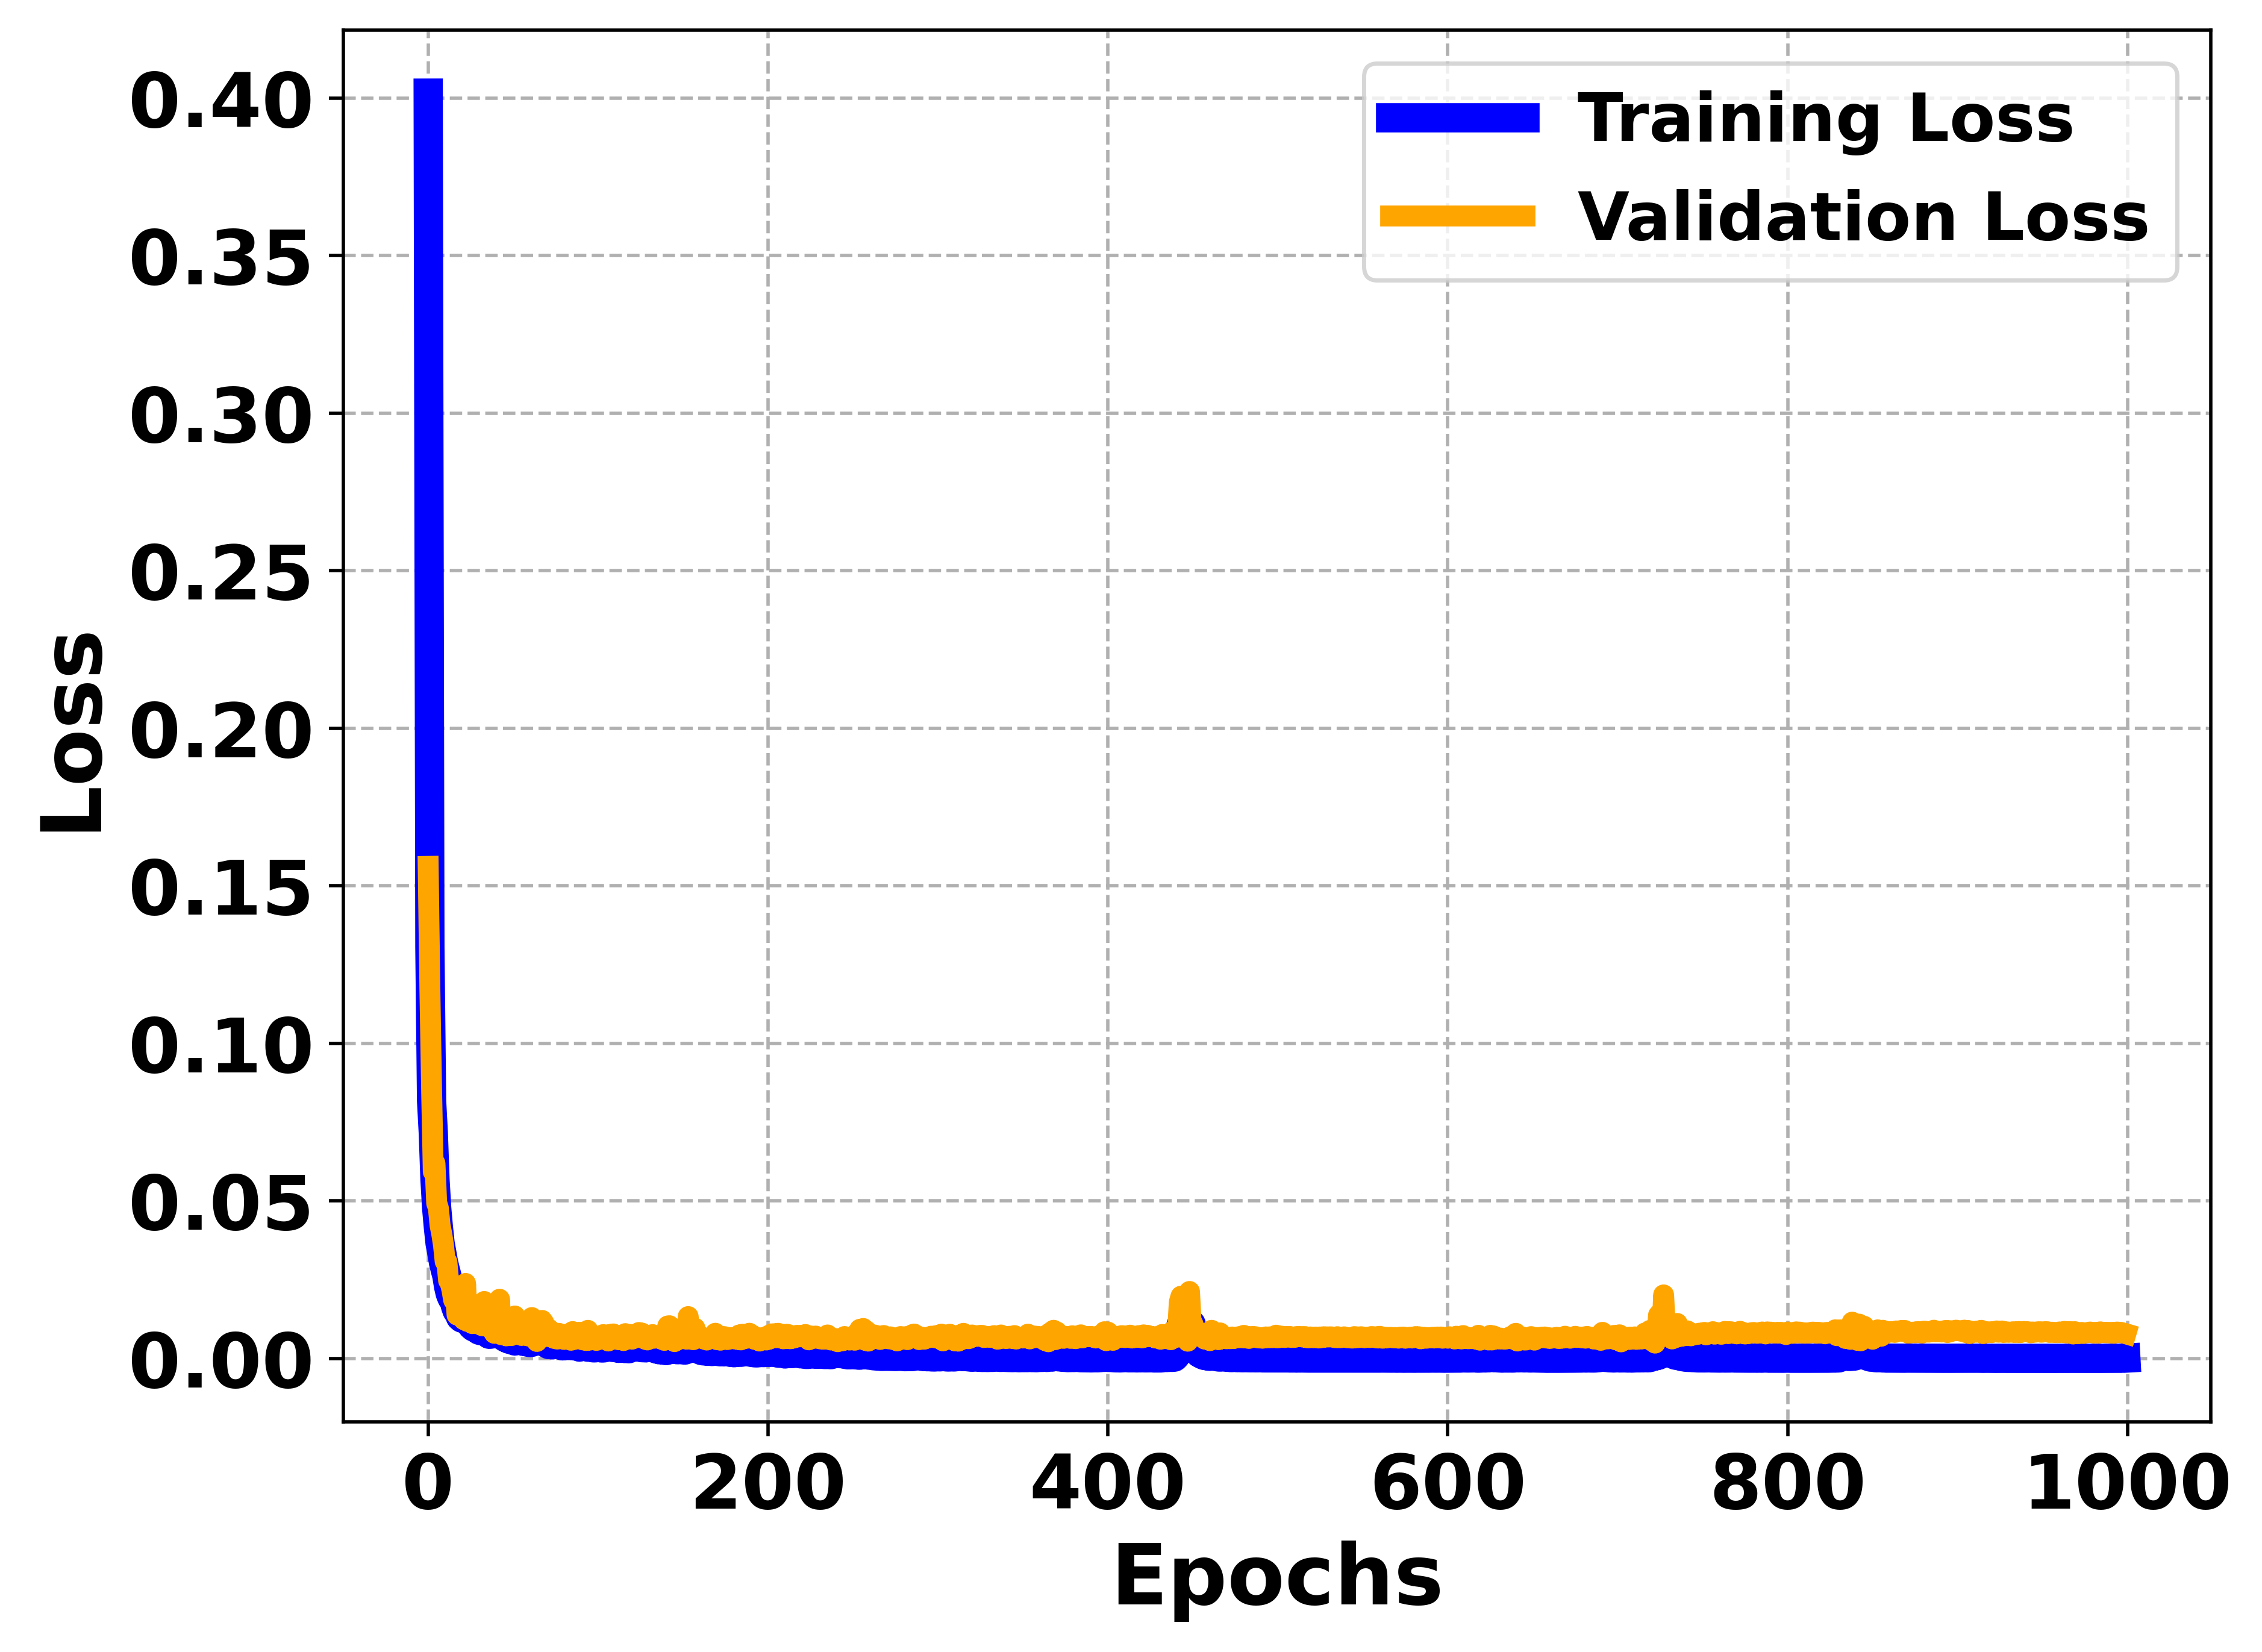

In [49]:
plt.figure(figsize=(8, 6), dpi=500)
plt.plot(loss, label='Training Loss', color='blue', linewidth=7, alpha=1)
plt.plot(val_loss, label='Validation Loss', color='orange', linewidth=5, alpha=1)
plt.xlabel('Epochs', fontsize=20, fontweight='bold')
plt.ylabel('Loss', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend(fontsize=18, prop={'weight': 'bold'}) 
plt.grid(True, linestyle='--', alpha=1)
plt.show()

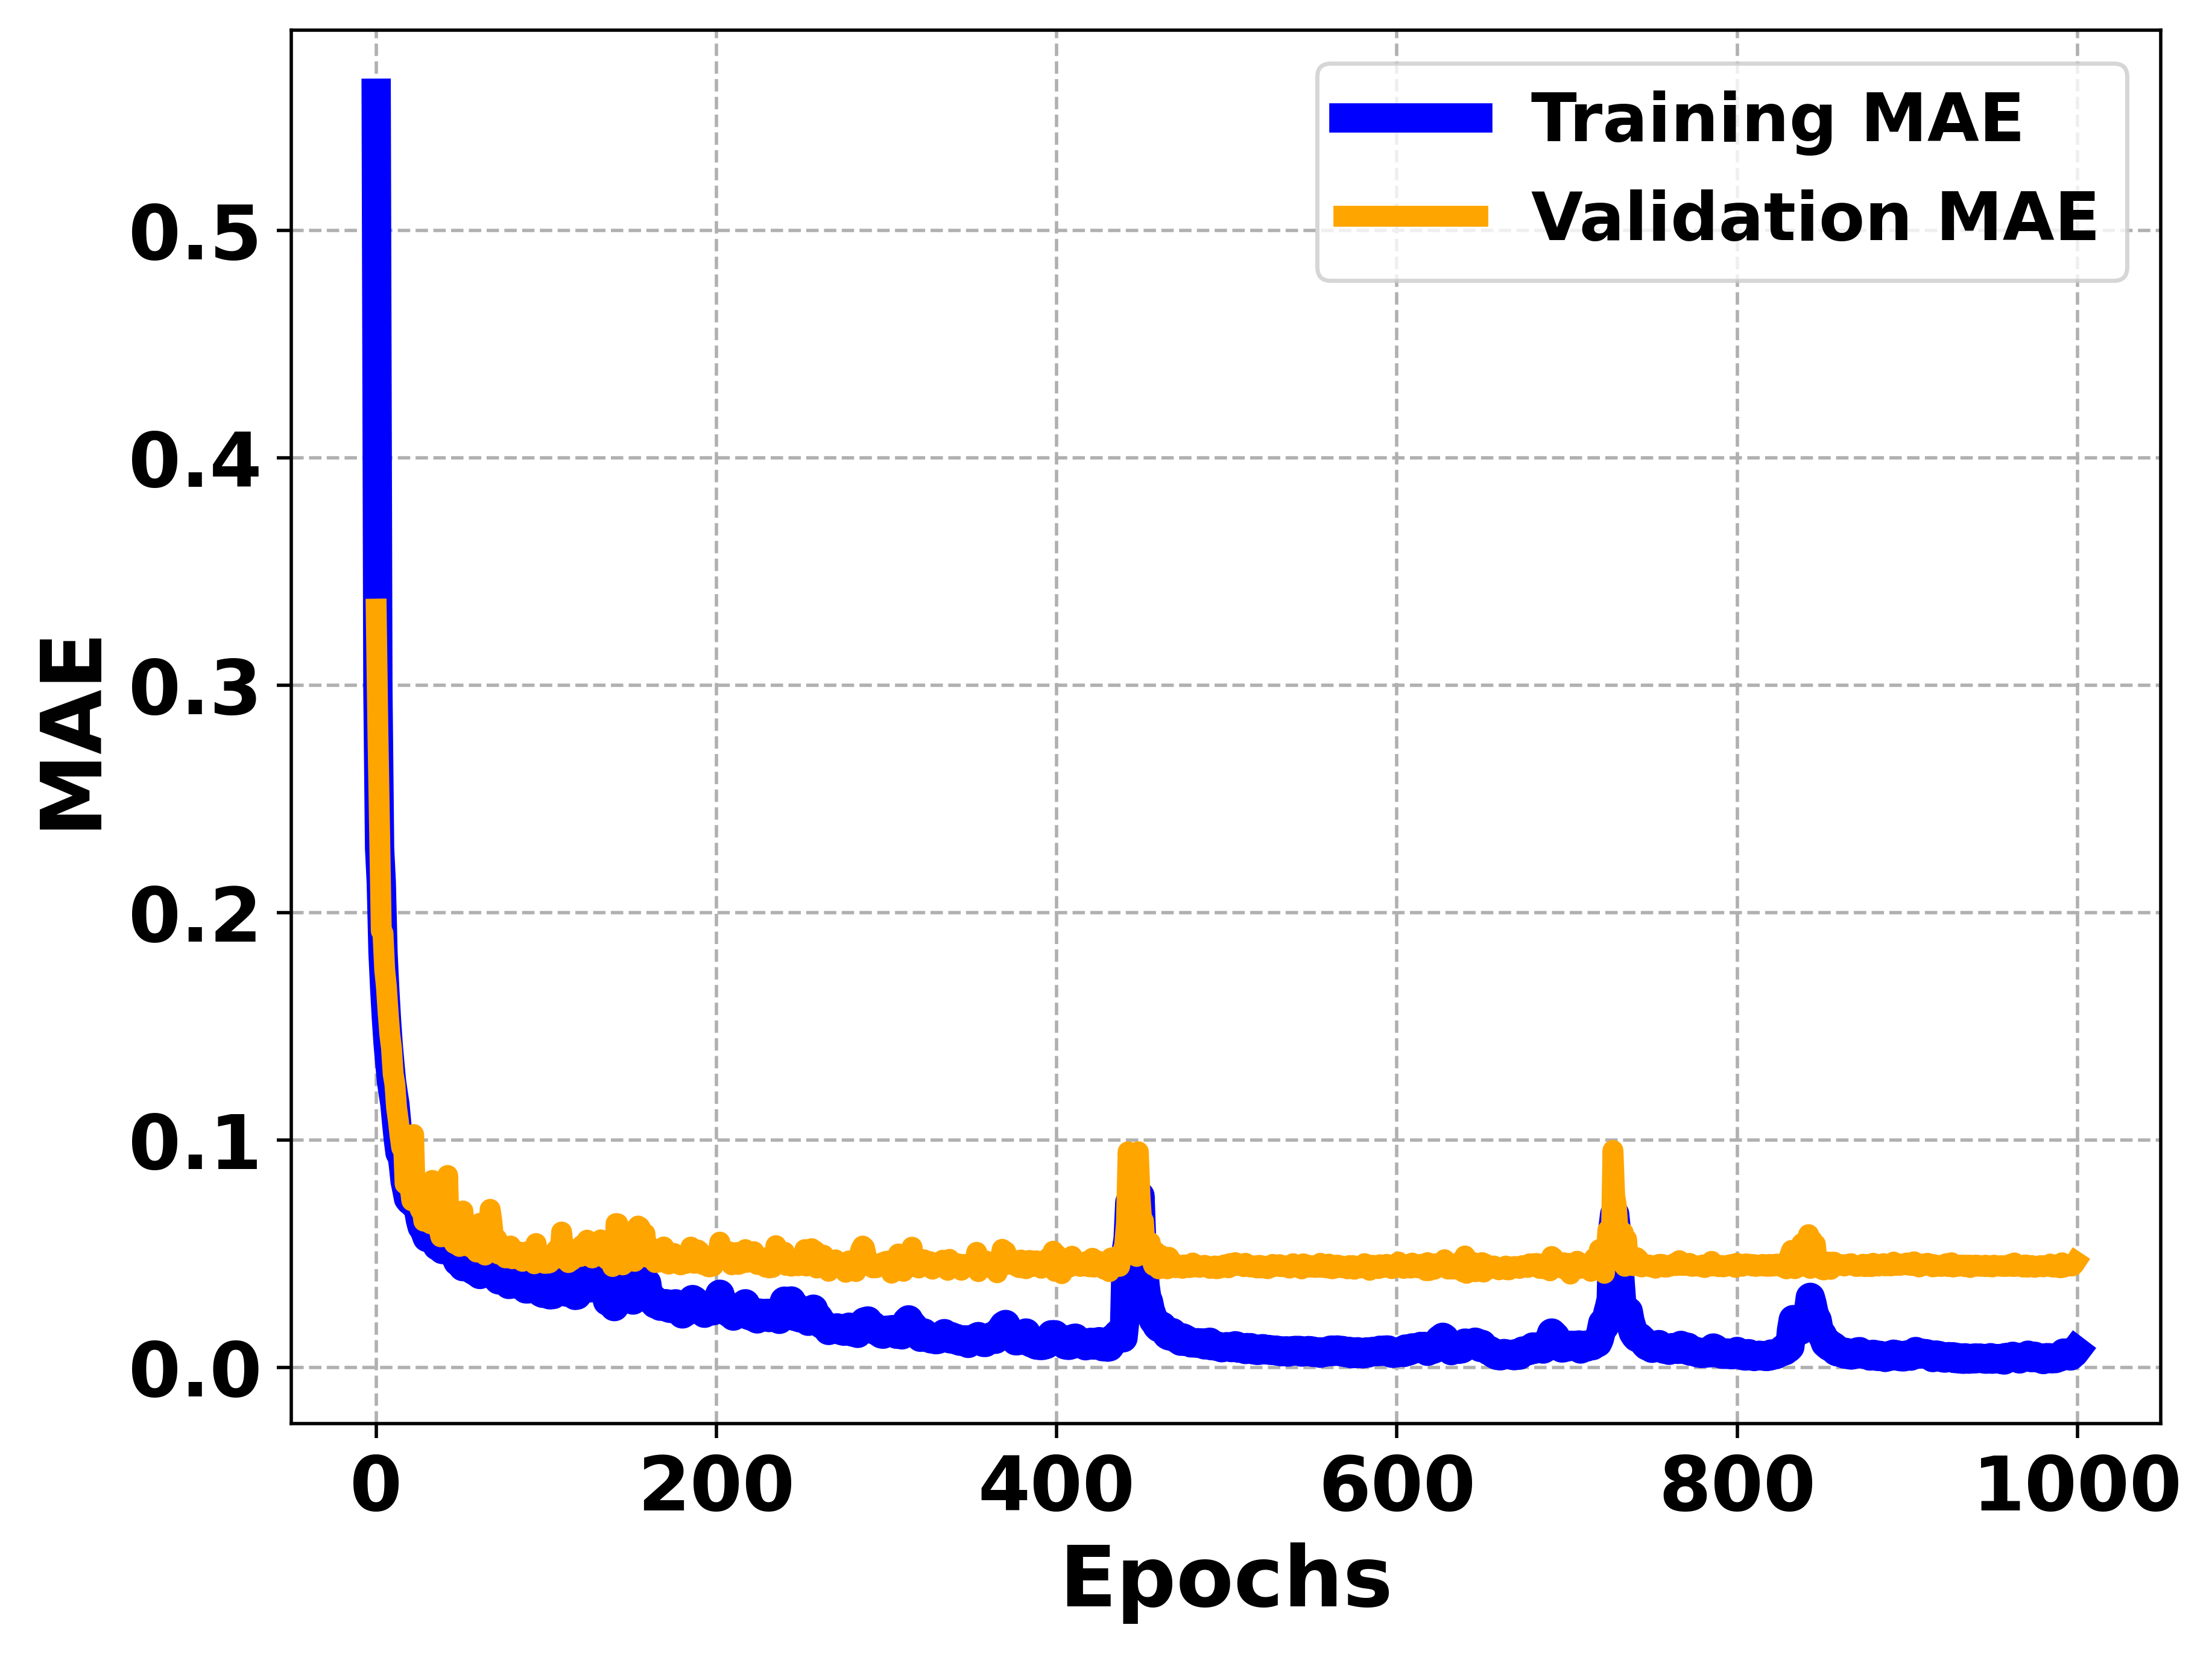

In [50]:
plt.figure(figsize=(8, 6), dpi=500)
plt.plot(mae, label='Training MAE', color='blue', linewidth=7, alpha=1)
plt.plot(val_mae, label='Validation MAE', color='orange', linewidth=5, alpha=1)
plt.xlabel('Epochs', fontsize=20, fontweight='bold')
plt.ylabel('MAE', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend(fontsize=18, prop={'weight': 'bold'})  
plt.grid(True, linestyle='--', alpha=1)
plt.show()

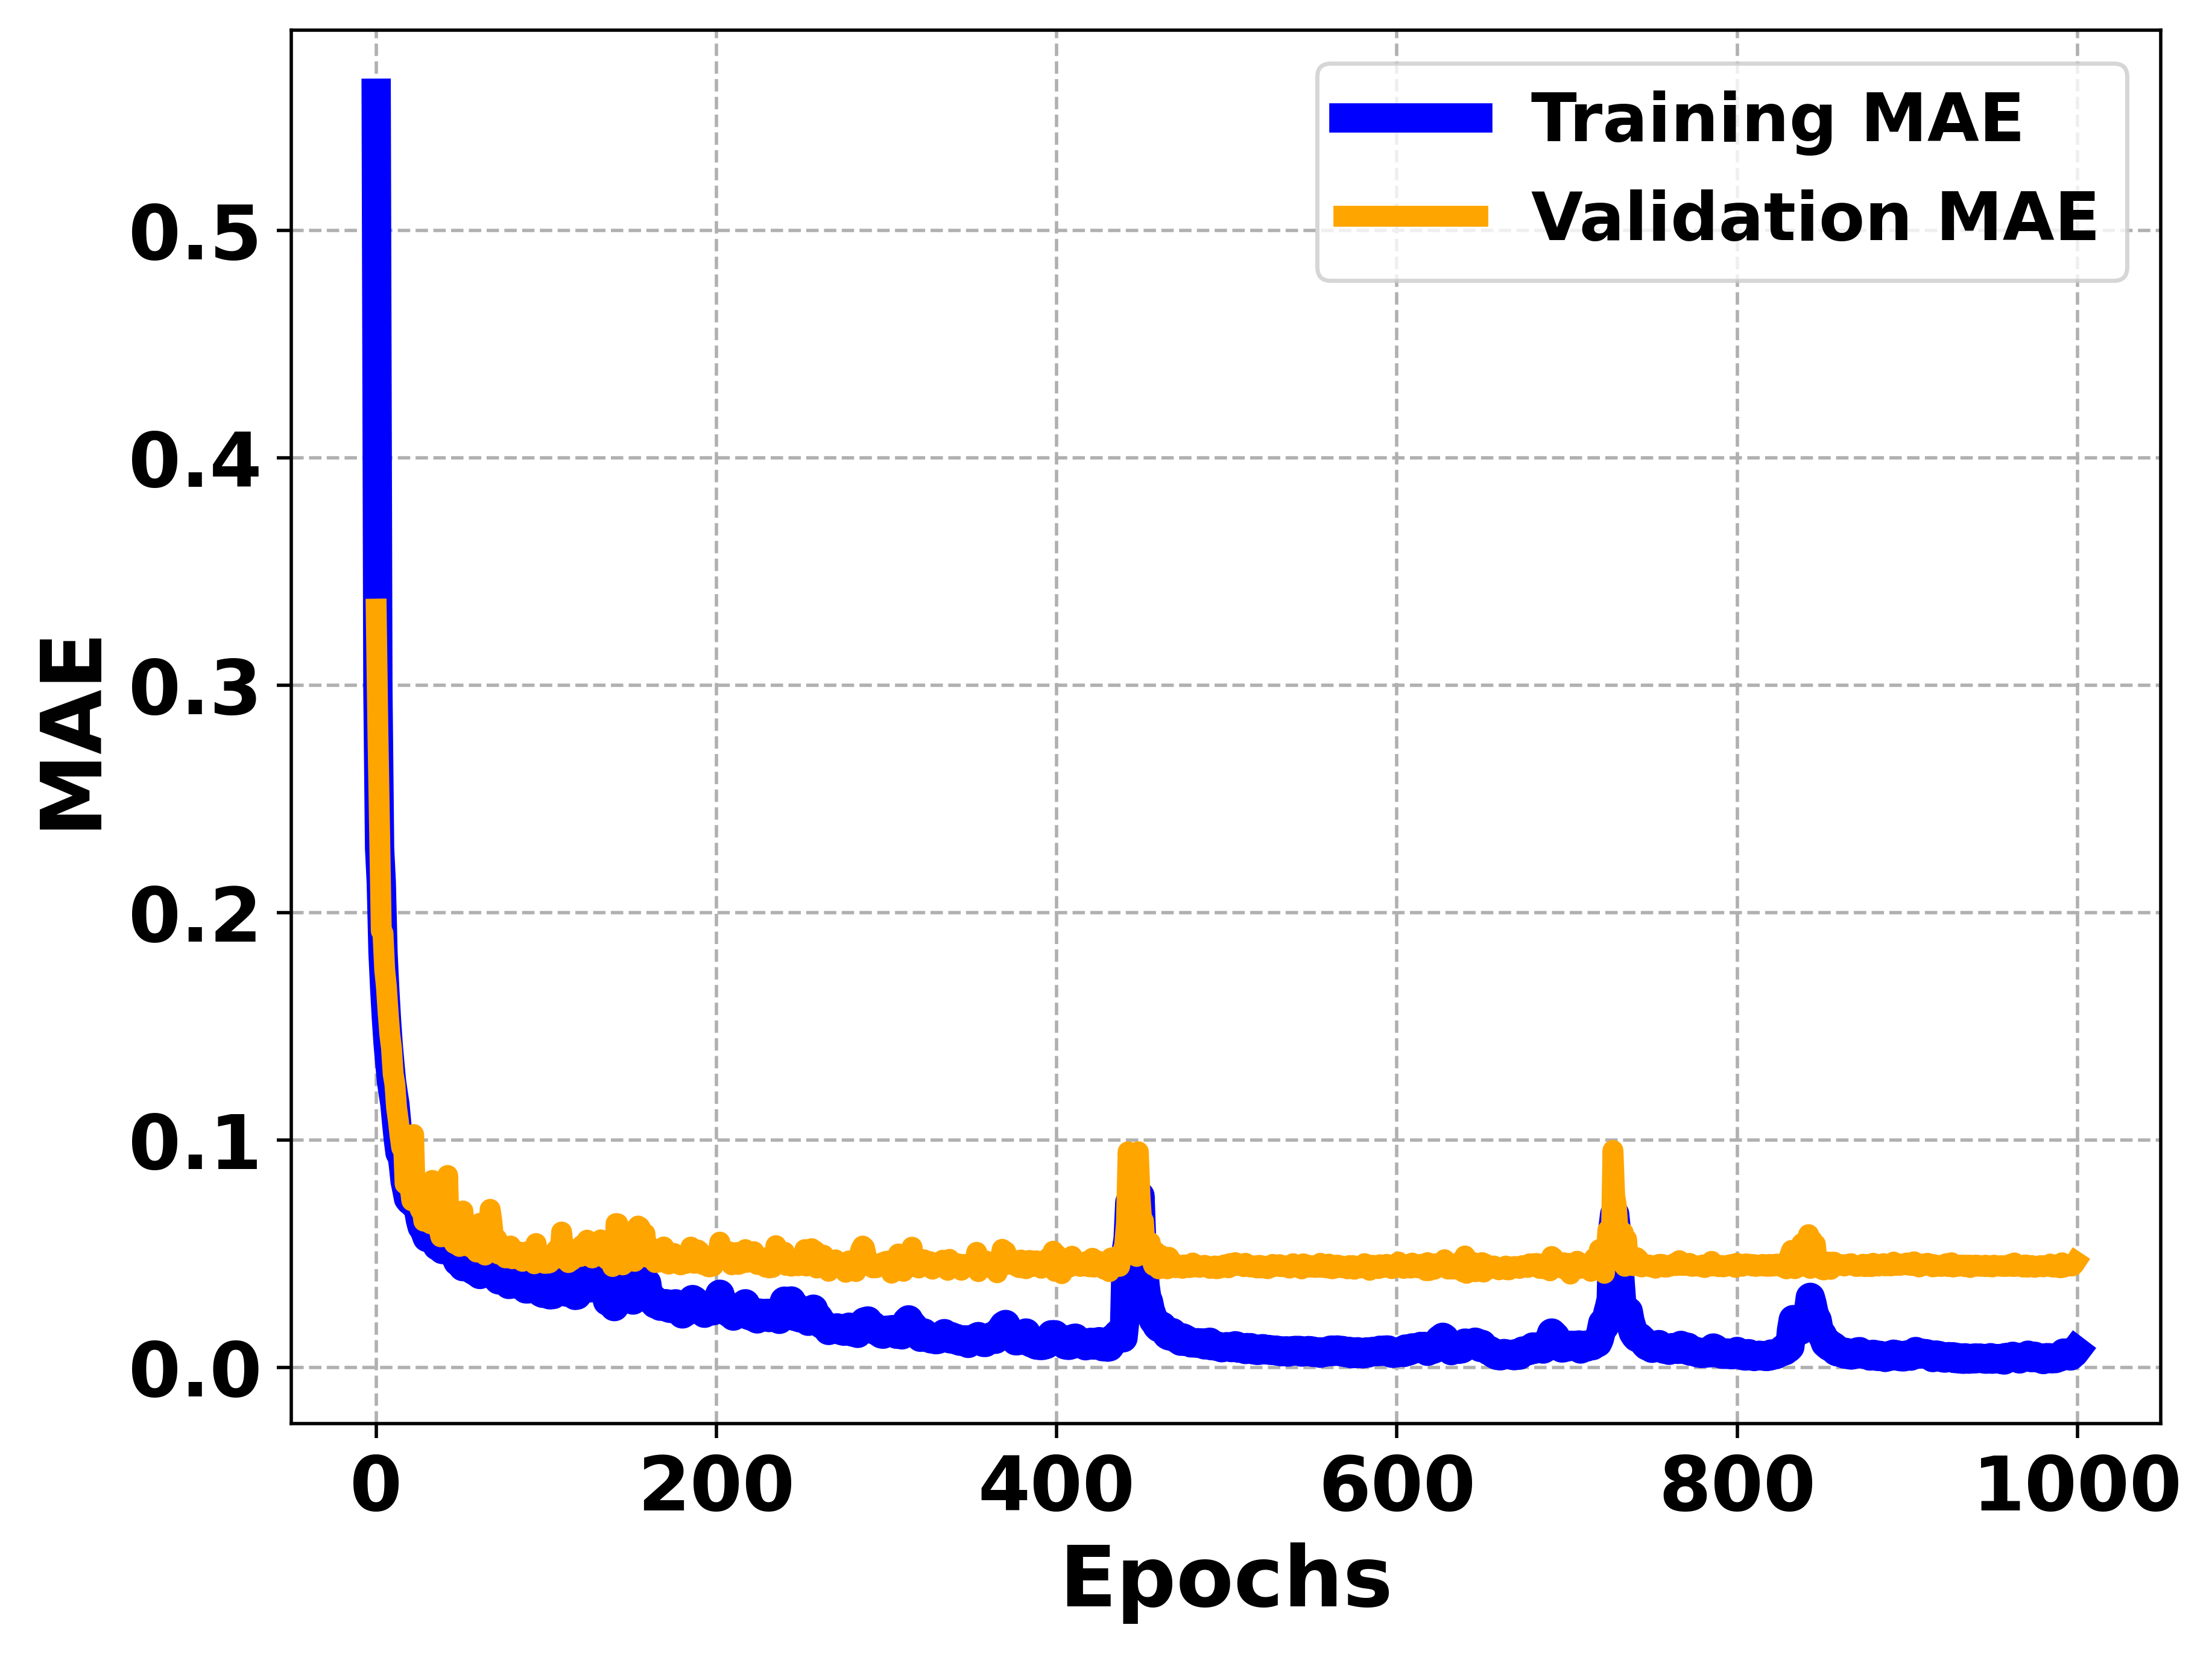

In [51]:
plt.figure(figsize=(8, 6), dpi=500)
plt.plot(mae, label='Training MAE', color='blue', linewidth=7, alpha=1)
plt.plot(val_mae, label='Validation MAE', color='orange', linewidth=5, alpha=1)
plt.xlabel('Epochs', fontsize=20, fontweight='bold')
plt.ylabel('MAE', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend(fontsize=18, prop={'weight': 'bold'})  
plt.grid(True, linestyle='--', alpha=1)
plt.show()